# Practice Lab: Buenos Aires Subway - Sorting and filtering

You're continuing your exploration of the Buenos Aires Subway system and want to look at the busiest stations. You now have all passenger counts for all stations in the subway network, for all open hours for the month of March 2024. This will be *a lot* more information than before. Your analysis can help you recommend if a station will need more train cars to accommodate the traffic or how much resources are needed for crowd control. 

<div style="text-align: center;">
<img src="imgsL2/subway_map_wcircle.jpg" alt="Subway map" width="600"/>
</div>

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of Contents

- [Step 1: Load and sort the dataset](#step-1)
- [Step 2: Filter a subway line](#step-2)
- [Step 3: Select rows](#step-3)
- [Step 4: Filter rush hours](#step-4)

<a id="step-1"></a>
## Step 1: Load and sort the dataset

The cell below imports the CSV you will be working with. This data corresponds to the number of passengers at every station in the subway system of Buenos Aires in March 2024, with an hourly granularity. It consists of 5 features:

- `date`: date of the observation, in format YYYY-MM-DD
- `hour`: hour of the observation
- `station`: name of the subway station
- `line`: name of the subway line (A, B, C, D, E, H). Each line corresponds to one of the colored lines in the map above.
- `pax_TOTAL`: total number of passengers at the station 

In [1]:
# import pandas
import pandas as pd

# Load the data
df = pd.read_csv("march2024_pax_hourly.csv")

# Show the first few rows
df.head()

,date,hour,station,line,pax_TOTAL
0,2024-03-01,5,Acoyte,A,50
1,2024-03-01,5,Aguero,D,1
2,2024-03-01,5,Alberti,A,6
3,2024-03-01,5,Angel Gallardo,B,30
4,2024-03-01,5,Avenida La Plata,E,26


You can use a function defined in the `helper_functions.py` file in your workspace to print the number of rows and unique stations in the DataFrame.

In [2]:
import helper_functions

# Utility function for printing rows and stations
helper_functions.print_rows_stations(df)

number of rows: 49219

stations in this DataFrame:
['Acoyte' 'Aguero' 'Alberti' 'Angel Gallardo' 'Avenida La Plata'
 'Avenida de Mayo' 'Boedo' 'Bolivar' 'Callao.B' 'Carabobo' 'Carlos Gardel'
 'Carlos Pellegrini' 'Caseros' 'Castro Barros' 'Catalinas' 'Congreso'
 'Constitucion' 'Cordoba' 'Correo Central' 'Corrientes' 'Diagonal Norte'
 'Dorrego' 'Echeverria' 'Emilio Mitre' 'Entre Rios' 'Facultad de Derecho'
 'Federico Lacroze' 'Flores' 'Florida' 'General Belgrano'
 'General San Martin' 'Hospitales' 'Humberto I' 'Inclan' 'Independencia'
 'Independencia.H' 'Jose Maria Moreno' 'Jujuy' 'Las Heras' 'Lavalle'
 'Leandro N. Alem' 'Lima' 'Loria' 'Los Incas' 'Malabia' 'Mariano Moreno'
 'Medalla Milagrosa' 'Medrano' 'Ministro Carranza' 'Once' 'Pasco'
 'Pasteur' 'Patricios' 'Peru' 'Pichincha' 'Piedras' 'Plaza Italia'
 'Plaza Miserere' 'Plaza de Mayo' 'Primera Junta' 'Puan' 'Pueyrredon'
 'Pza. de los Virreyes' 'Retiro' 'Retiro E' 'Rio de Janeiro' 'Rosas'
 'Saenz Pena ' 'San Jose' 'San Juan' 'San Pedri

Now that you've seen some characteristics of the dataset, you want to sort it by `line` and `pax_TOTAL` so you can analyze the busiest times in each subway line.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Define a <code>columns</code> variable to hold the list of features that you want to sort the dataset by. These will be by <code>line</code> first, then <code>pax_TOTAL</code>.
            <li>Define an <code>order</code> variable to contain boolean values. These will specify if you will sort a feature in ascending order or not. You will sort <code>line</code> <b>ascending</b>, then <code>pax_TOTAL</code> <b>descending</b>.
            <li>Use the <code>sort_values()</code> method to sort the <df> DataFrame by the columns in the orders you specified. Store the result in <code>df_sorted</code></li>
        </ol>
</div>

In [3]:
### START CODE HERE ###

# Create a list of strings to hold two features: 'line' and 'pax_TOTAL'.
columns = ['line', 'pax_TOTAL']

# Create a list of booleans to specify the sorting order. 'line' is ascending, 'pax_TOTAL' is descending.
order = [True, False]

# Sort the dataframe by the columns and order you specified.
df_sorted = df.sort_values(by=columns, ascending=order)

### END CODE HERE ###

# Preview the results
df_sorted.head()

,date,hour,station,line,pax_TOTAL
40234,2024-03-26,8,San Pedrito,A,4252
32079,2024-03-21,8,San Pedrito,A,4179
28713,2024-03-19,8,San Pedrito,A,4169
41920,2024-03-27,8,San Pedrito,A,4099
38548,2024-03-25,8,San Pedrito,A,4081


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>
<img src="imgsL2/output_step1.png" width="400">
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Create a list of strings to hold two features: 'line' and 'pax_TOTAL'.
columns = ["line", "pax_TOTAL"]

# Create a list of booleans to specify the sorting order. 'line' is ascending, 'pax_TOTAL' is descending.
order = [True, False]

# Sort the dataframe by the columns and order you specified.
df_sorted = df.sort_values(by=columns, ascending=order)
```
</details>

<a id="step-2"></a>

## Step 2: Filter a subway line

Now that you have the sorted dataset. You can filter a subway line and it will return a sorted dataset by total passengers. For this exercise, you will filter line E.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter <code>df_sorted</code> for data points that are in <b>line E</b>.
        </ol>
</div>

In [10]:
# You can change this later if you want. You can choose from: [A, B, C, D, E, H].
line = 'E'

### START CODE HERE ###

# Filter `df_sorted` for rows that match the line specified
df_filter_line = df_sorted[df_sorted['line'] == line]

### END CODE HERE

helper_functions.print_rows_stations(df_filter_line)

number of rows: 10135

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo' 'Urquiza' 'San Jose' 'Entre Rios'
 'Varela' 'Medalla Milagrosa' 'Pichincha' 'Jujuy']



<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

```text
number of rows: 10135

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo' 'Urquiza' 'San Jose' 'Entre Rios'
 'Varela' 'Medalla Milagrosa' 'Pichincha' 'Jujuy']
```
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Filter `df_sorted` for rows that match the line specified
df_filter_line = df_sorted[df_sorted["line"]==line]
```
</details>

If you look at the resulting DataFrame, every row should have the `line` column equals `E`.

In [11]:
# Preview the result
df_filter_line.head()

,date,hour,station,line,pax_TOTAL
15805,2024-03-11,12,Independencia.H,E,2371
29029,2024-03-19,12,Independencia.H,E,2283
27345,2024-03-18,12,Independencia.H,E,2226
29442,2024-03-19,17,Bolivar,E,2195
16218,2024-03-11,17,Bolivar,E,2192


<a id="step-3"></a>

## Step 3: Select top rows

You only want the most crowded times so you need to reduce the dataset. There are many ways to do this but for this exercise, you will practice slicing the dataset to select a range of rows.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the <code>iloc()</code> method on <code>df_filter_line</code> to slice the first 500 rows. Assign the result to the <code>df_sliced</code> variable. (<i>Note: You know you can also do this with <code>head()</code> but avoid doing that for now.</i>)
        </ol>
</div>

In [12]:
### START CODE HERE ###

# Slice the first 500 rows.
df_sliced = df_filter_line.iloc[0:500]

### END CODE HERE ###

helper_functions.print_rows_stations(df_sliced)

number of rows: 500

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo']



<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```text
number of rows: 500

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo']
```

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look somet
hing like this:

```python
# Slice the first 500 rows.
df_sliced = df_filter_line.iloc[0:500]
```
</details>

<a id="step-4"></a>

## Step 4: Filter rush hours

Now you have a subset of the data containing the top 500 data points by total number of passengers. If you want to know what times these usually occur, you can plot a histogram of the 'hour' feature and see which hours have the highest peaks.

<Axes: >

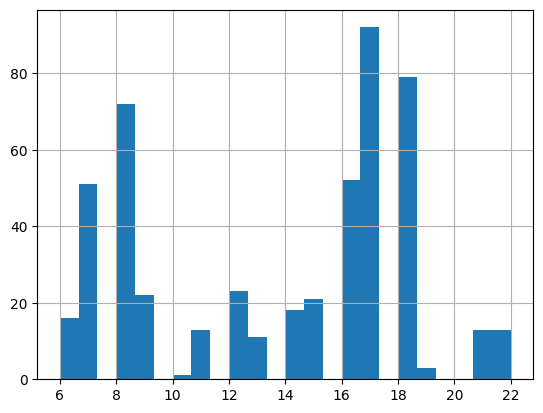

In [13]:
# Visualize when the busiest times occur
df_sliced['hour'].hist(bins=24)

The chart show several peaks and you want to focus on the afternoon rush hour between 16:00 to 18:00.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter <code>df_sliced</code> by two conditions: 'hour' should be greater than or equal to 16, and should be less than or equal to 18. Assign the result to the <code>df_filter_pm</code> variable.
        </ol>
</div>

In [14]:
### START CODE HERE ###

# Filter `df_sliced` for 'hour' greater than or equal to 16, and less than or equal to 18.
df_filter_pm = df_sliced[(df_sliced['hour'] >= 16) & (df_sliced['hour'] <= 18)]

### END CODE HERE ###

helper_functions.print_rows_stations(df_filter_pm)

number of rows: 223

stations in this DataFrame:
['Bolivar' 'Independencia.H' 'Catalinas' 'Correo Central'
 'General Belgrano' 'Retiro E']



<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```text
number of rows: 223

stations in this DataFrame:
['Bolivar' 'Independencia.H' 'Catalinas' 'Correo Central'
 'General Belgrano' 'Retiro E']
```

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# Filter `df_sliced` for 'hour' greater than or equal to 16, and less than or equal to 18.
df_filter_pm = df_sliced[(df_sliced["hour"] >= 16) & (df_sliced["hour"] <= 18)]
```
</details>

Great! Now you see these 6 stations are the busiest based on the criteria you specified. You can recommend these to your stakeholders as the ones needing the most attention during these hours.

**Congratulations for making it until the end of this lab. There is one more lab to go!**